In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df= pd.read_csv("Expanded_data_with_more_features.csv")

In [123]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [125]:
#checking null values:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [128]:
#checking the number of columns:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [129]:
#dropping the unnamed column
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [130]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [ ]:
df['WklyStudyHours']= df['WklyStudyHours'].str.replace('05-Oct', '5-10') 
#or another way:
#df.replace({'05-Oct': 5-10})

In [135]:
print(df.head)

<bound method NDFrame.head of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelor's degree      standard       none   
1      female     group C        some college      standard        NaN   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0            

**GENDER DISTRIBUTION**

Axes(0.125,0.11;0.775x0.77)


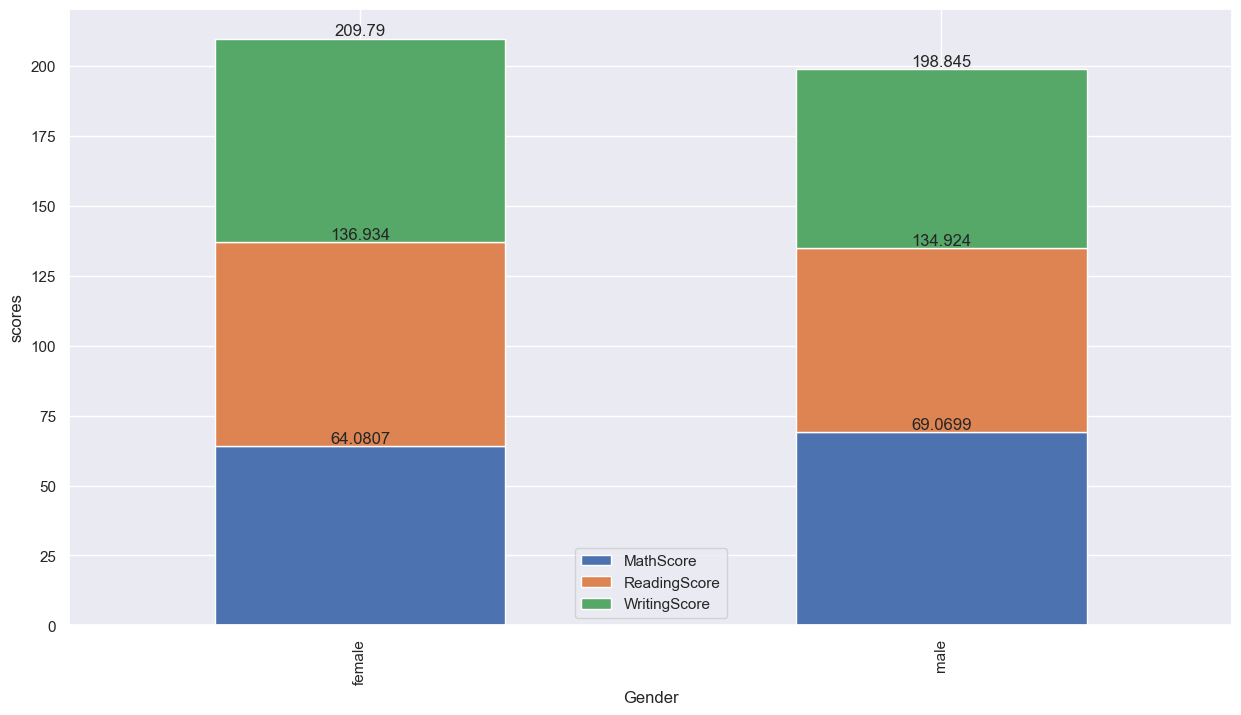

In [119]:
gen= df.groupby("Gender").agg({'MathScore':'mean' , 'ReadingScore': 'mean' , 'WritingScore':'mean'}).plot(kind='bar', stacked= True, figsize=(15,8))
plt.ylabel("scores")
for bars in gen.containers:
    gen.bar_label(bars)
print(gen)

**From the above chart we can conclude that females performance in reading and writing is better than men  
while men perfomed better in maths than  females**

PARENT EDUCATION WITH THE STUDENTS SCORE

In [44]:
gb= df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


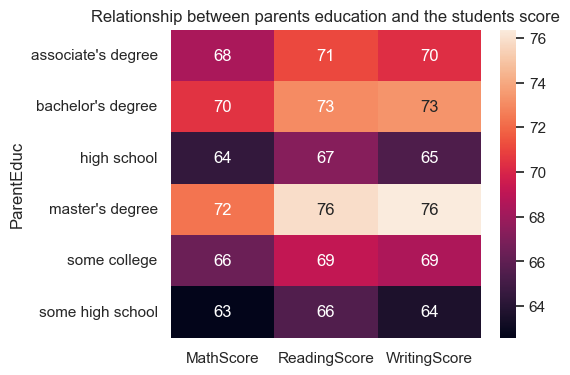

In [55]:
sns.heatmap(gb , annot= True)
plt.title("Relationship between parents education and the students score")
plt.show()

**From the above chart we have concluded that the education of the parents have a good impact on their scores**

In [48]:
gb1 = df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print (gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


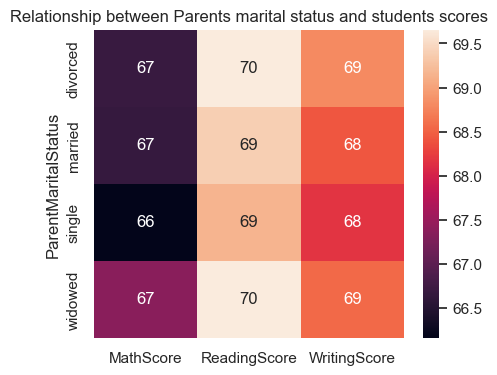

In [56]:
sns.heatmap(gb1, annot=True)
plt.title("Relationship between Parents marital status and students scores")
sns.set(rc={'figure.figsize':(5,4)})

**From this we can conclude that the marital status of parents have no impact on the Students scores.**

WEEKLY STUDY HOURS

Axes(0.125,0.11;0.775x0.77)


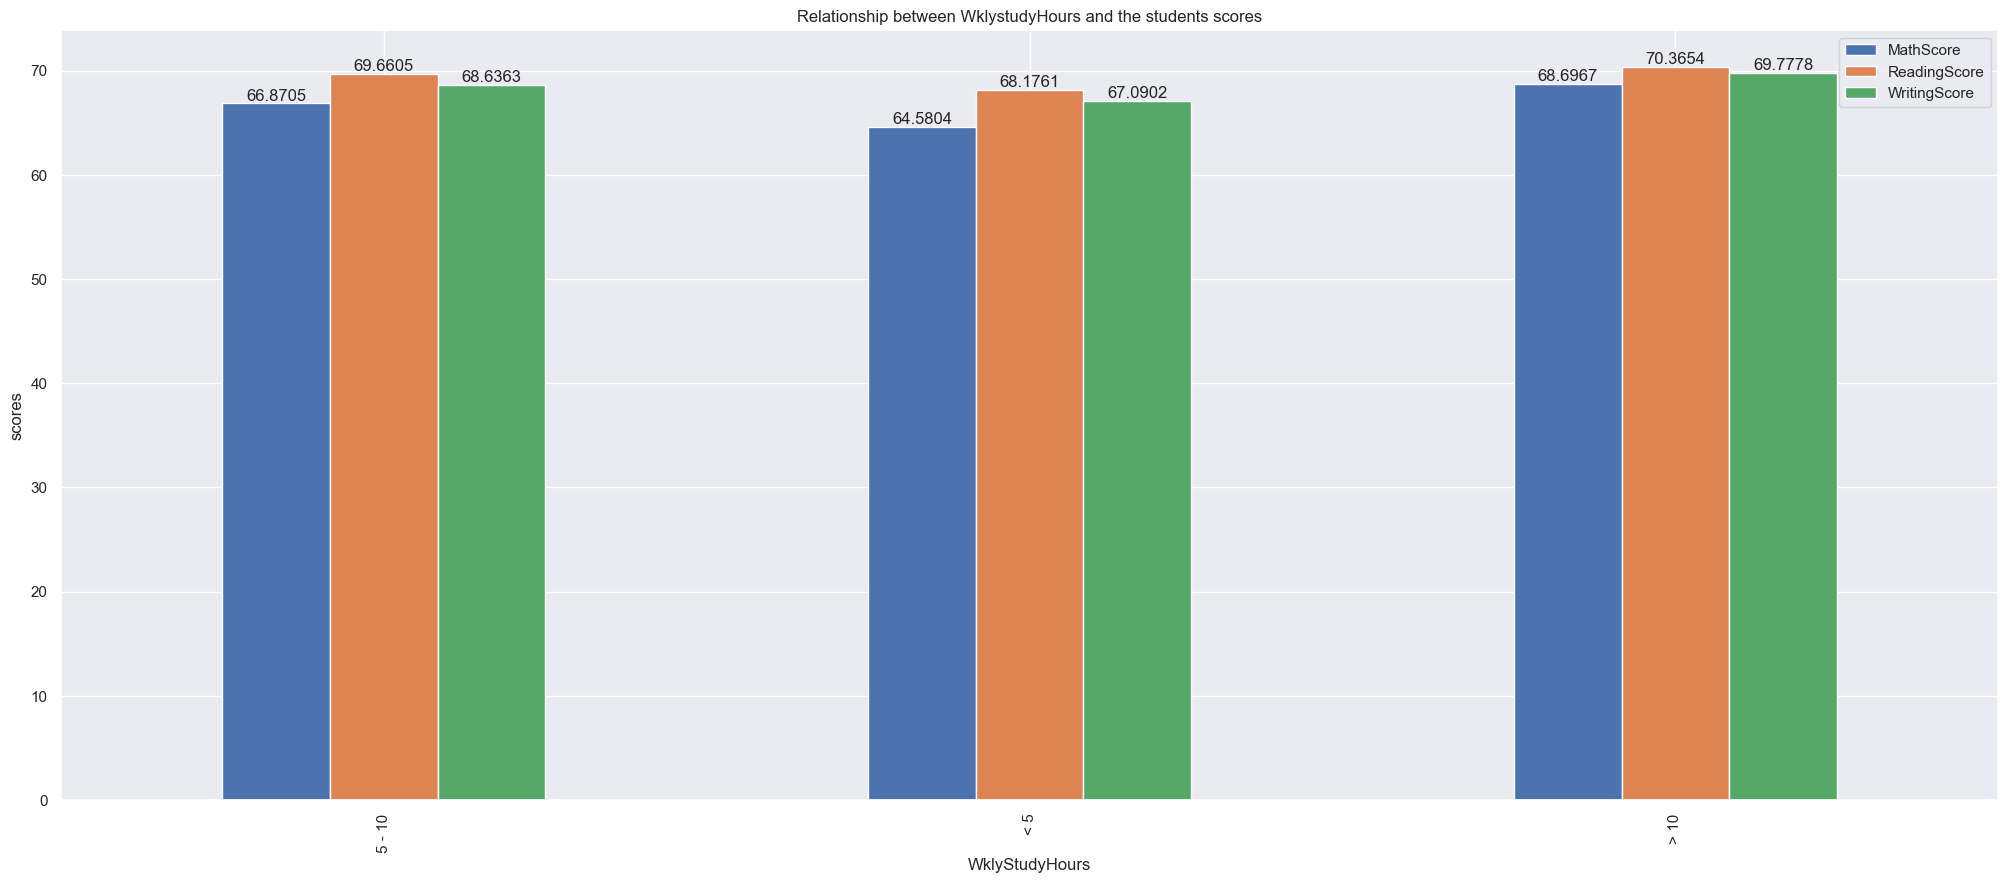

In [96]:
sns.set(rc={'figure.figsize':(25,10)})
gb2 = df.groupby("WklyStudyHours").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}).plot(kind='bar')
print (gb2)
plt.title("Relationship between WklystudyHours and the students scores")
plt.ylabel("scores")
for bars in gb2.containers:
    gb2.bar_label(bars)

**From the above chart we can conclude that the students who devoted more than 10 hours in a week has good reading score, math score and writing score**

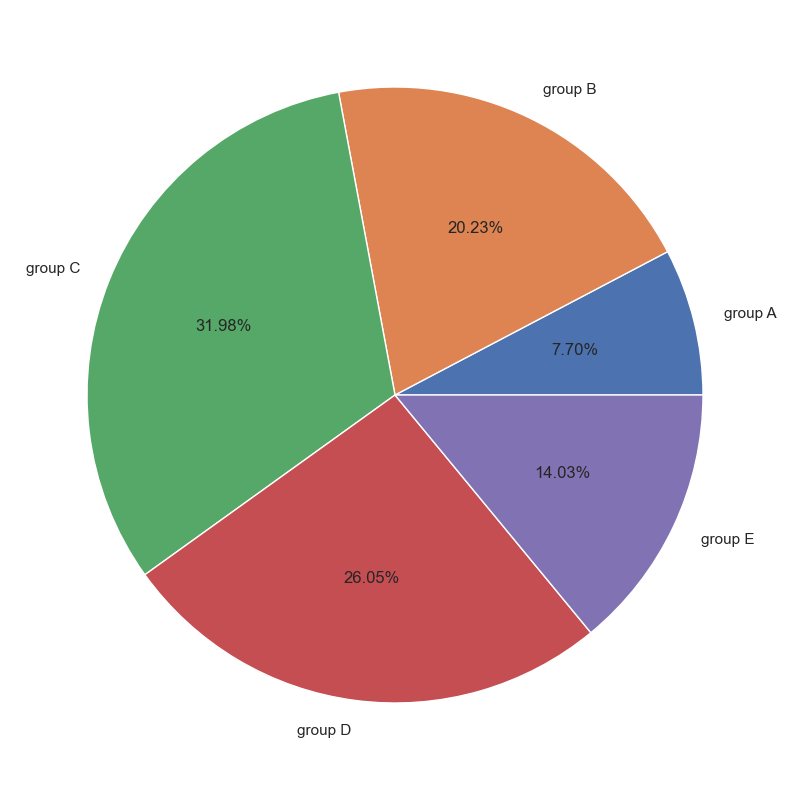

In [160]:
groupA= df.loc[ (df['EthnicGroup'] == "group A")].count()
groupB= df.loc[ (df['EthnicGroup'] == "group B")].count()
groupC= df.loc[ (df['EthnicGroup'] == "group C")].count()
groupD= df.loc[ (df['EthnicGroup'] == "group D")].count()
groupE= df.loc[ (df['EthnicGroup'] == "group E")].count()
l=["group A", "group B" , "group C", "group D", "group E"]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist, autopct="%1.2f%%", labels= l , figsize=(15,)
plt.title("Distribution of Ethnic groups")
plt.show()
         